#**201955718 - MELIA PUTRI H - 머신러닝 Assignment 2 (APPLIED)**
From the textbook ***“Introduction to Statistical Learning”*** by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani
1. **No.9 Page 137 PDF (122 Physical Book): Auto Dataset**
2. **No.15 Page 141 PDF (126 Physical Book): Boston Dataset**

**(Conceptual: No. 1, 3, 7)**




###**0. Importing the Libraries**

In [1]:
#Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###**1. Problem No. 9 Page 137 PDF (122 Physical Book): Auto Data**

This question involves the use of multiple linear regression on the `Auto` data set.

**Attributes:**
* `mpg` : meters per gallon
* `cylinders` : number of cylinders in the engine
* `displacement` : engine displacement
* `horsepower` : horsepower of the car
* `weight` : weight of the car (in lbs)
* `acceleration`: 	acceleration of the car (most likely (s) it took the car from 0-60)
* `year` : model year of the car
* `origin` : _unknown descriptor_ (probably related to area of the manufacturer)
* `name` : name of the car

#####**Processing the Dataset**
> **Notes**: When working on point (b), finding the predictors' range, it turned out that the statistics data of `horsepower` could not be shown, so the we add `na_values='?'` to indicate the NA (Not Available) data. 

In the section, I will retrive the data from the internet, from the link that is put in the cell below:

In [2]:
#Importing the Data Set
auto_url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Auto.csv"
auto=pd.read_csv(auto_url,na_values='?')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [3]:
#Checking Missing Values
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [4]:
#Dropping out the Null
auto=auto.dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


#####**(a) Produce a scatterplot matrix which includes all of the variables in the data set**

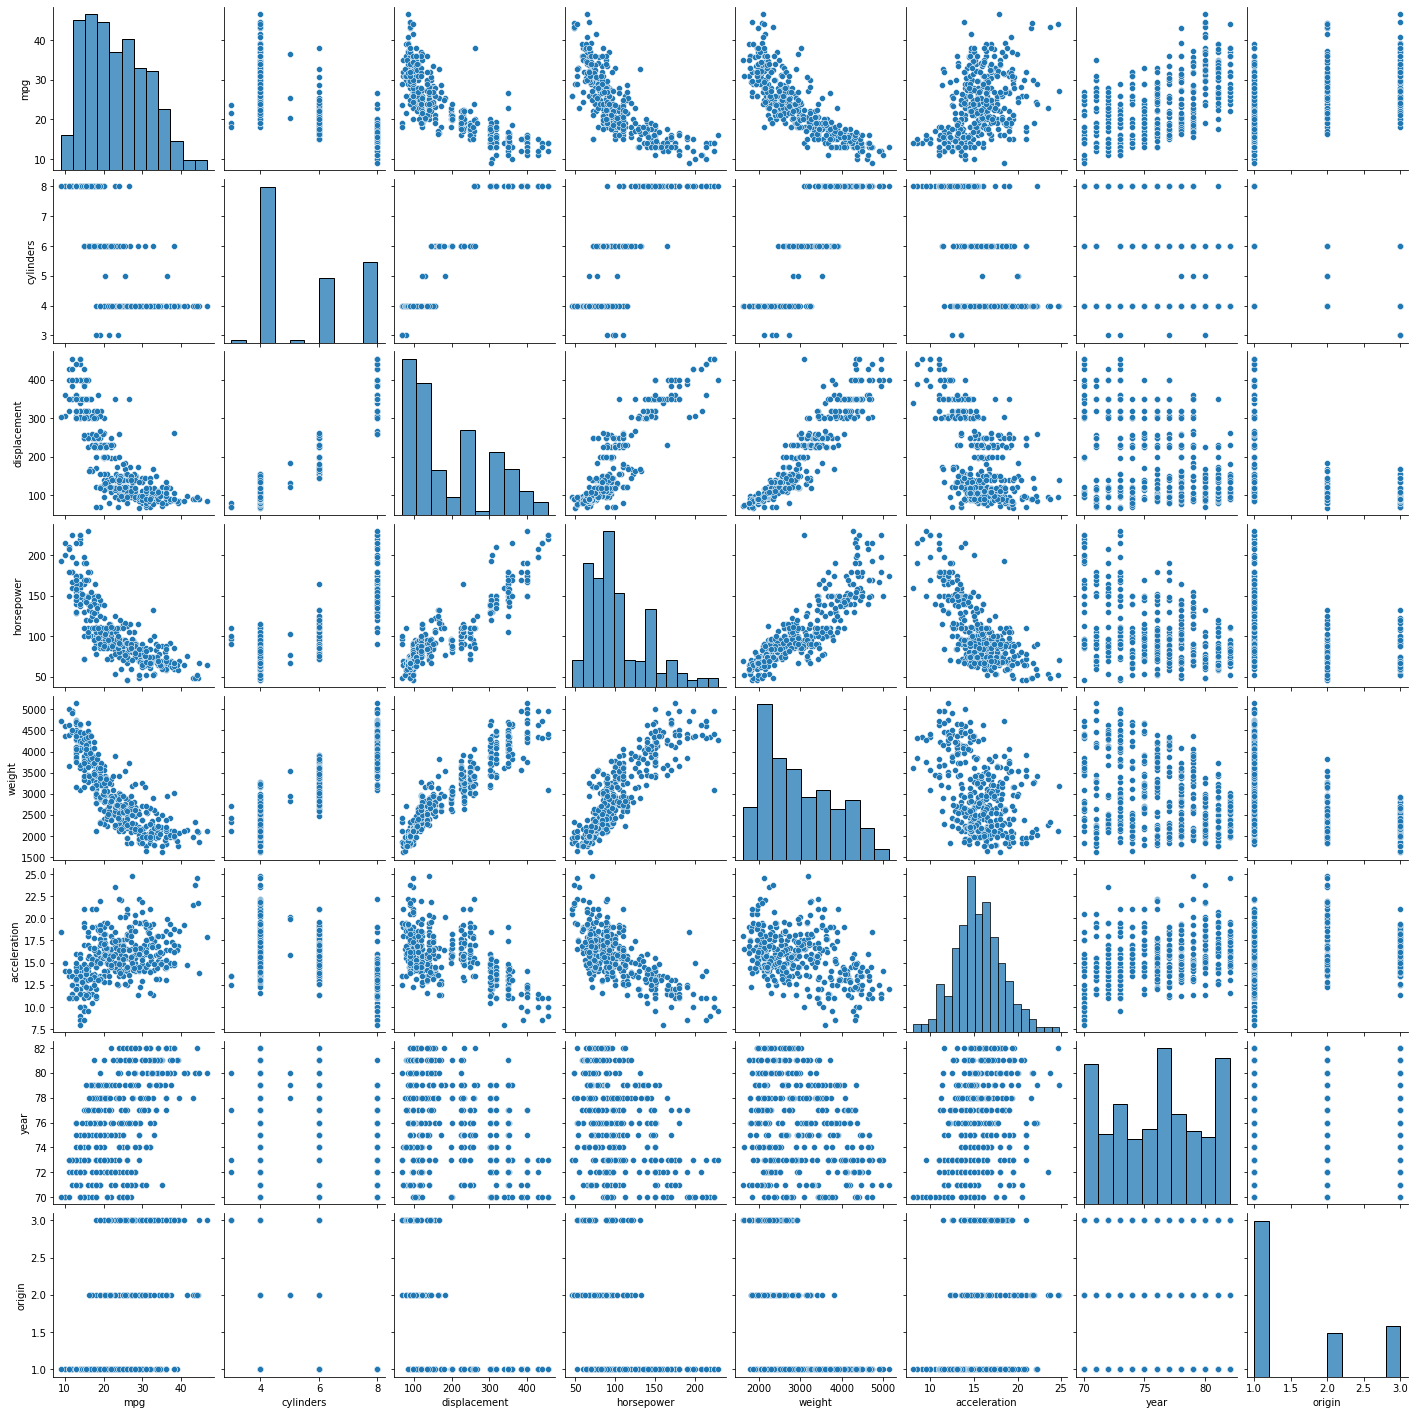

In [5]:
#Scatterplot matrix of the dataset using Seaborn
plt.rcParams['figure.facecolor']='white'
sns.pairplot(auto)
plt.show()

#####**(b) Compute the matrix of correlations between the variables using the function `corr()`. You will need to exclude the `name` variable, which is qualitative**

In [6]:
#Correlations between variables
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#####**(c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summary()` function to print the results. Comment on the output. For instance:**

1. Is there a relationship between the predictors and the response?
2. Which predictors appear to have a statistically significant relationship to the response?
3. What does the coefficient for the `year` variable suggest?

######**Using `import statsmodels.api as sm` then `sm.OLS()` function**

In [7]:
#First, we need to import Statsmodels Module
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [9]:
#Then, perform the multiple linear regression with Statsmodels: Ordinary Least Square sm.OLS(endog)

#Response variable
y=auto['mpg']

#All other variables except 'name'
x=auto[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]

ml_reg=sm.OLS(y,x)
result=ml_reg.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                        0.00
Time:                        09:08:30   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

**ANSWER**
1. Is there a relationship between the predictors and the response?
  * The Probability F-Statistics is less than 0.05 which shows there are relationships between predictors and response variable. The F-statistics also has large value which indicates a better fit in a regression model.
2. Which predictors appear to have a statistically significant relationship to the response?
  * The p-value (which is represented by "P>|t|") that valued more than 0.05 are all predictors except `acceleration`, so except `accelaration`, other predictors have relationship with the response variable `mpg`
3. What does the coefficient for the `year` variable suggest?
   * The coefficient of `year` variable is 0.5836 which is positive, so the increase in `year` as predictor will increase the `mpg` value as the response variable.

######**Using `from statsmodels.formula.api import ols` instead of `import statsmodels.api as sm` then `sm.OLS()` function**

In [10]:
from statsmodels.formula.api import ols

In [11]:
ml_reg=ols("mpg ~ cylinders+displacement+horsepower+weight+acceleration+year+origin",auto)
result=ml_reg.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          2.04e-139
Time:                        09:08:30   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707   

**ANSWER**
1. Is there a relationship between the predictors and the response?
  * The Probability F-Statistics is less than 0.05 which shows there are relationships between predictors and response variable. The F-statistics also has large value which indicates a better fit in a regression model.
2. Which predictors appear to have a statistically significant relationship to the response?
  * The p-value (which is represented by "P>|t|") that valued more than 0.05 are `displacement`, `weight`, `year`, and `origin`, so they are the predictors that have relationship with the response variable `mpg`
3. What does the coefficient for the `year` variable suggest?
   * The coefficient of `year` variable is 0.7508 which is positive, so the increase in `year` as predictor will increase the `mpg` value as the response variable.

#####**(d) Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?**

In [12]:
from statsmodels.nonparametric.smoothers_lowess import lowess

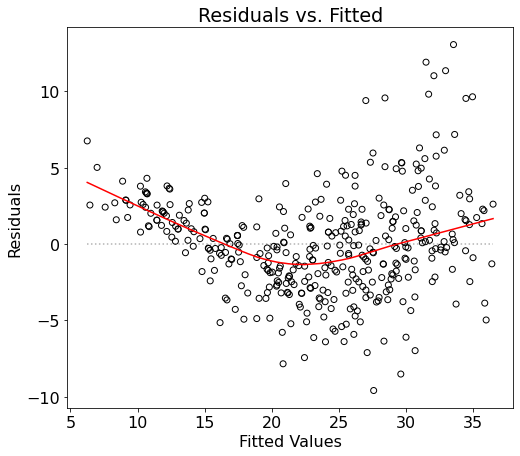

In [13]:
#Residuals Plots
residuals=result.resid
fitted=result.fittedvalues
smoothed=lowess(residuals,fitted)

plt.rcParams.update({'font.size':16})
plt.rcParams["figure.figsize"] =(8,7)
fig,ax=plt.subplots()
ax.scatter(fitted, residuals,edgecolors='k',facecolors ='none')
ax.plot(smoothed[:,0],smoothed[:,1],color ='r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color='k',linestyle=':',alpha=0.3)

plt.show()

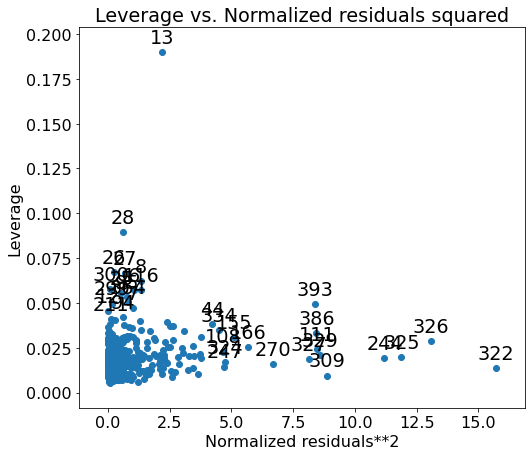

In [14]:
#Leverage Plots
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(result)
plt.show()

#####**(e) Use the `*` and `:` symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?**

In [15]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [16]:
#Interaction term with product of 'cylinders' and 'acceleration'
ml_reg=ols('mpg ~ + cylinders * acceleration',data=auto).fit()
print(ml_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     202.0
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           6.64e-79
Time:                        09:08:31   Log-Likelihood:                -1176.8
No. Observations:                 392   AIC:                             2362.
Df Residuals:                     388   BIC:                             2377.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31

In [17]:
#Interaction term with product of 'horsepower' and 'acceleration'
ml_reg=ols('mpg ~ + cylinders * acceleration',data=auto).fit()
print(ml_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     202.0
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           6.64e-79
Time:                        09:08:31   Log-Likelihood:                -1176.8
No. Observations:                 392   AIC:                             2362.
Df Residuals:                     388   BIC:                             2377.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31

In [18]:
#Interaction term with product of 'cylinders' and 'displacement'
ml_reg=ols('mpg ~ + cylinders * acceleration',data=auto).fit()
print(ml_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     202.0
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           6.64e-79
Time:                        09:08:31   Log-Likelihood:                -1176.8
No. Observations:                 392   AIC:                             2362.
Df Residuals:                     388   BIC:                             2377.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31

In [19]:
#Interaction term with product of 'cylinders' and 'acceleration'
ml_reg=ols('mpg ~ + horsepower * weight',data=auto).fit()
print(ml_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          7.26e-116
Time:                        09:08:31   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            63.5579      2.34

#####**(f) Try a few different transformations of the variables, such as $log(X)$, $\sqrt{X}$, $X^2$. Comment on your findings**

In [20]:
#Interaction term with product of 'cylinders' and 'acceleration'
ml_reg=ols('mpg ~ + displacement + cylinders^2',data=auto).fit()
print(ml_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     397.1
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.08e-94
Time:                        09:08:31   Log-Likelihood:                -1143.2
No. Observations:                 392   AIC:                             2292.
Df Residuals:                     389   BIC:                             2304.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        32.4053      0.707     45.837

In [21]:
#Interaction term with product of 'cylinders' and 'acceleration'
ml_reg=ols('mpg ~ + cylinders * np.sqrt(acceleration)',data=auto).fit()
print(ml_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     201.8
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           7.48e-79
Time:                        09:08:31   Log-Likelihood:                -1176.9
No. Observations:                 392   AIC:                             2362.
Df Residuals:                     388   BIC:                             2378.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [22]:
#Interaction term with product of 'cylinders' and 'acceleration'
ml_reg=ols('mpg ~ + horsepower * np.log(weight)',data=auto).fit()
print(ml_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 18 Oct 2020   Prob (F-statistic):          1.09e-114
Time:                        09:08:31   Log-Likelihood:                -1093.4
No. Observations:                 392   AIC:                             2195.
Df Residuals:                     388   BIC:                             2211.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

###**2. Problem No.15 Page 141 PDF (126 Physical Book): Boston Dataset**

This problem involves the `Boston` data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate `CRIM` using the other variables in this data set. In other words, per capita crime rate `CRIM` is the response, and the other variables are the predictors.

**Attributes:**
* `CRIM` - per capita crime rate by town
* `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
* `INDUS` - proportion of non-retail business acres per town.
* `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* `NOX` - nitric oxides concentration (parts per 10 million)
* `RM` - average number of rooms per dwelling
* `AGE` - proportion of owner-occupied units built prior to 1940
* `DIS` - weighted distances to five Boston employment centres
* `RAD` - index of accessibility to radial highways
* `TAX` - full-value property-tax rate per USD10,000
* `PTRATIO` - pupil-teacher ratio by town
* `B` - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* `LSTAT` - % lower status of the population
* `MEDV` - Median value of owner-occupied homes in USD1000's

#####**Importing the Data Set**

In [23]:
boston_url="https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston=pd.read_csv(boston_url)
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


#####**(a) For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.**

* Response variable is `crim`

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
y=boston.iloc[:,:1]
y.shape

(506, 1)

In [29]:
x=boston.iloc[:,1:2]
x=np.array(x)
x.shape

(506, 1)

In [99]:
cols=[1,2,3,4,5,6,7,8,9,10,11,12,13]
reg=LinearRegression()
print("The coefficient of predictors start from zn to medv:")
coeff=[]

for i in cols:
  j=i+1
  x=boston.iloc[:,i:j]
  reg.fit(x,y)
  coeff.append(reg.coef_)
  print(reg.coef_)

The coefficient of predictors start from zn to medv:
[[-0.07393498]]
[[0.50977633]]
[[-1.89277655]]
[[31.2485312]]
[[-2.68405122]]
[[0.10778623]]
[[-1.55090168]]
[[0.61791093]]
[[0.02974225]]
[[1.15198279]]
[[-0.03627964]]
[[0.54880478]]
[[-0.36315992]]


In [101]:
coeff=np.asarray(coeff)
coeff=coeff.reshape(13,1)
coeff

array([[-7.39349774e-02],
       [ 5.09776331e-01],
       [-1.89277655e+00],
       [ 3.12485312e+01],
       [-2.68405122e+00],
       [ 1.07786227e-01],
       [-1.55090168e+00],
       [ 6.17910927e-01],
       [ 2.97422528e-02],
       [ 1.15198279e+00],
       [-3.62796406e-02],
       [ 5.48804782e-01],
       [-3.63159922e-01]])

In [124]:
dataset=pd.DataFrame(coeff)
dataset.columns=['Coef']
dataset

,Coef
0,-0.073935
1,0.509776
2,-1.892777
3,31.248531
4,-2.684051
5,0.107786
6,-1.550902
7,0.617911
8,0.029742
9,1.151983


In [126]:
df=pd.DataFrame({'Coef':[coeff]})
df

,Coef
0,"[[-0.0739349774041235], [0.5097763311042312], ..."


In [111]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [112]:
predictors=[['zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']]
predictors

[['zn',
  'indus',
  'chas',
  'nox',
  'rm',
  'age',
  'dis',
  'rad',
  'tax',
  'ptratio',
  'b',
  'lstat',
  'medv']]

In [113]:
simpledf=pd.DataFrame(smplreglist,index=['Predictors','Coef']).T
simpledf

,Predictors,Coef
0,"[[-0.0739349774041235], [0.5097763311042312], ...","[zn, indus, chas, nox, rm, age, dis, rad, tax,..."


In [114]:
print("The intercept of predictors start from zn to medv:")

for i in cols:
  j=i+1
  x=boston.iloc[:,i:j]
  reg.fit(x,y)
  print(reg.intercept_)

The intercept of predictors start from zn to medv:
[4.45369376]
[-2.06374261]
[3.74444684]
[-13.71988231]
[20.48180418]
[-3.77790632]
[9.49926165]
[-2.28715945]
[-8.52836909]
[-17.64693347]
[16.55352922]
[-3.33053806]
[11.79653575]


In [32]:
print("The intercept of predictors start from zn to medv:")

for i in cols:
  j=i+1
  x=boston.iloc[:,i:j]
  est=sm.OLS(y,x).fit()
  print(est.summary())

The intercept of predictors start from zn to medv:
                                 OLS Regression Results                                
Dep. Variable:                   crim   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                           0.007420
Date:                Sun, 18 Oct 2020   Prob (F-statistic):                       0.931
Time:                        09:10:26   Log-Likelihood:                         -1847.6
No. Observations:                 506   AIC:                                      3697.
Df Residuals:                     505   BIC:                                      3701.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025   

#####**(b) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0 : β_j = 0$?**

In [47]:
ml_reg=ols("crim ~ zn+indus+chas+nox+rm+age+dis+rad+tax+ptratio+b+lstat+medv",data=boston).fit()
summary=ml_reg.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.57e-56
Time:                        09:15:35   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.0

In [34]:
reject=ml_reg.pvalues<0.05
reject

Intercept     True
zn            True
indus        False
chas         False
nox          False
rm           False
age          False
dis           True
rad           True
tax          False
ptratio      False
b             True
lstat        False
medv          True
dtype: bool

From the statement above, the predictors that can make us reject the null hypothesis are `zn`, `dis`, `rad`, `b`, and `medv`.

#####**(c) How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefficients from (a) on the $x-axis$, and the multiple regression coefficients from (b) on the $y-axis$. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the $x-axis$, and its coefficient estimate in the multiple linear regression model is shown on the $y-axis$**

In [54]:
#Coefficient of each predictor in Simple Linear Regression
coeff_smpl_reg=[-0.07393498,1,24,5,5]
coeff_smpl_reg

[-0.07393498, 1, 24, 5, 5]

In [51]:
#Coefficient of each predictor in Multiple Linear Regression
coeff_ml_reg=ml_reg.params
coeff_ml_reg

Intercept    17.033228
zn            0.044855
indus        -0.063855
chas         -0.749134
nox         -10.313535
rm            0.430131
age           0.001452
dis          -0.987176
rad           0.588209
tax          -0.003780
ptratio      -0.271081
b            -0.007538
lstat         0.126211
medv         -0.198887
dtype: float64

In [57]:
coeff_ml_reg.dtypes

dtype('float64')

#####**(d) Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor $X$, fit a model of the form**

$Y = β_0 + β_1 X + β_2 X^2 + β_3 X^3 + ε$

### **Additional Codes to Solve CONCEPTUAL Problem No.3 Page 135 PDF (Page 120 Physical Book)**

Suppose we have a data set with five predictors, $X_1 = GPA$, $X_2 = IQ$, $X_3 = Gender$ (1 for Female and 0 for Male), $X_4$ = Interaction between GPA and IQ, and $X_5$ = Interaction between GPA and Gender. The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get $\hat{β_0} = 50$, $\hat{β_1} = 20$, $\hat{β_2} = 0.07$, $\hat{β_3} = 35$, $\hat{β_4} = 0.01$, $\hat{β_5} = −10$.

(a)

In [35]:
#Creates all the beta variables
beta_0=50   #Intercept
beta_1=20   #GPA
beta_2=0.07 #IQ
beta_3=35   #Gender (1 for Female and 0 for Male)
beta_4=0.01 #Interaction between GPA and IQ
beta_5=-10  #Interaction between GPA and Gender

In [36]:
gpa=np.arange(0.0,4.5,0.05)
gpa=np.array(gpa)
gpa.shape

(90,)

In [37]:
male_salary=beta_0+beta_1*gpa+beta_2+beta_4*gpa
female_salary=beta_0+beta_1*gpa+beta_2+beta_3+beta_4+beta_5*gpa

In [38]:
male_salary.shape

(90,)

In [39]:
female_salary.shape

(90,)

In [40]:
import statistics as s

In [41]:
male_avg_salary=s.mean(male_salary)
print("The Average Salary of MALE is: ", male_avg_salary)

The Average Salary of MALE is:  94.59224999999999


In [42]:
female_avg_salary=s.mean(female_salary)
print("The Average Salary of FEMALE is: ", female_avg_salary)

The Average Salary of FEMALE is:  107.32999999999998


<function matplotlib.pyplot.show>

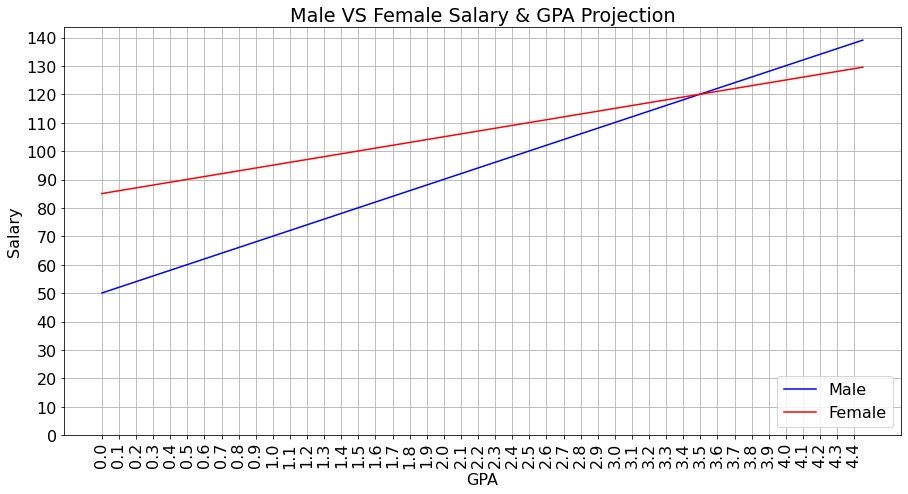

In [43]:
plt.figure(figsize=(15,7.5))
plt.plot(gpa,male_salary,'b')
plt.plot(gpa,female_salary,'r')
plt.xlabel("GPA")
plt.ylabel("Salary")
plt.title("Male VS Female Salary & GPA Projection")
plt.xticks(np.arange(0.0,4.5,0.1),rotation=90)
plt.yticks(np.arange(0.0,150,10))
plt.grid(True)
plt.legend(["Male","Female"],loc="lower right") 
plt.show

(b)

In [44]:
iq=110
gpa=4

female=(beta_0+beta_1*gpa+beta_2*iq+beta_3+beta_4*iq*gpa+beta_5*gpa)

print("Female with IQ = 110 and GPA = 4.0 can earn: ", female)

Female with IQ = 110 and GPA = 4.0 can earn:  137.1
